In [1]:
import pandas as pd
df = pd.read_csv('Transformed_Housing_Data2.csv')

Take a sample data to see how things are...

In [2]:
sale_price = df['Sale_Price'].head(30)
flat_area = df['Flat Area (in Sqft)'].head(30)
sample_data= pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})

plotting the sample data based on two variable flat area and sale price

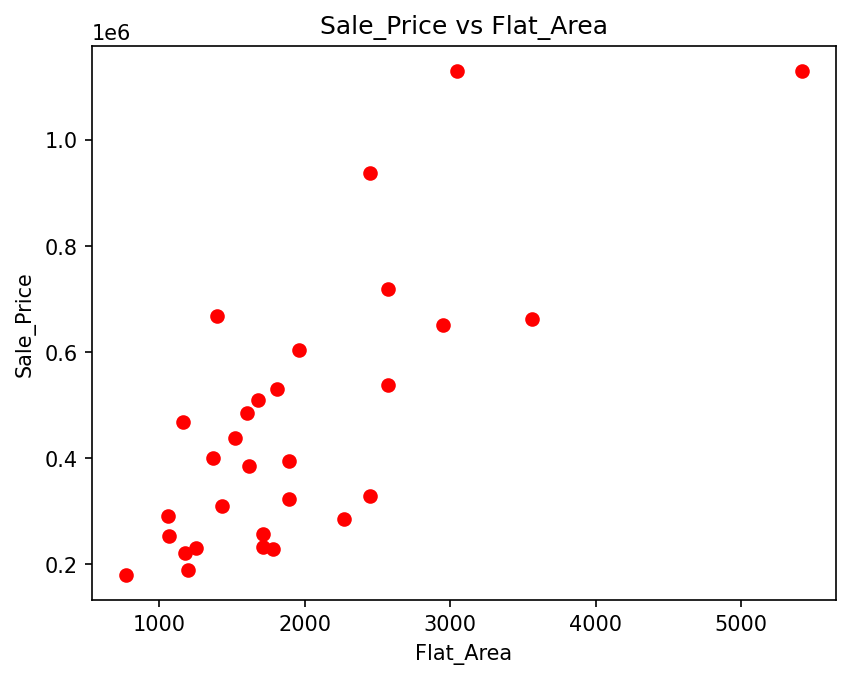

In [3]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)  

plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')  

plt.xlabel('Flat_Area')  # X-axis label
plt.ylabel('Sale_Price')  # Y-axis label
plt.title('Sale_Price vs Flat_Area')  

# Optional: Add legend only if you label the data
# For example: plt.scatter(..., label="Flats") and then:
# plt.legend()

plt.show()  # Display the plot


plotting the mean regression for sample data 

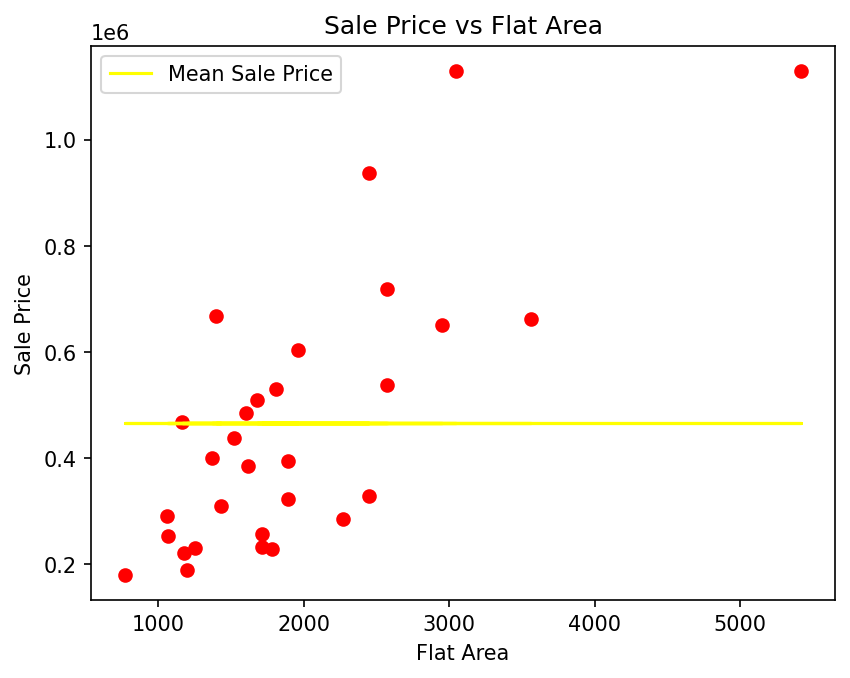

In [4]:
import matplotlib.pyplot as plt

# Add a new column with the mean sale price
sample_data["mean_sale_price"] = sample_data.sale_price.mean()

plt.figure(dpi=150)

# Scatter plot of actual data
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')

# Plot horizontal line for mean sale price
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color='yellow', label='Mean Sale Price')

plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Flat Area')
plt.legend()
plt.show()


Linear regression

In [5]:
c=0 
m=0
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m +c)

plot the graph and mse of this line with slope as m=0

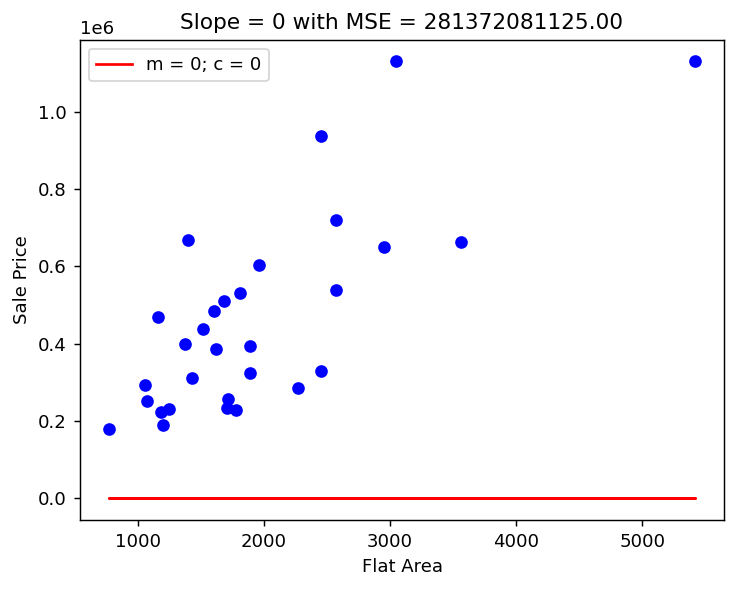

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse  # assuming you're using sklearn

# Assuming `line`, `m`, and `sample_data` are already defined
MSE = mse(sample_data.sale_price, line)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='blue')  # scatter plot
plt.plot(sample_data.flat_area, line, label=f'm = {m}; c = 0', color='red')  # predicted line

plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title(f"Slope = {m} with MSE = {MSE:.2f}")
plt.legend()
plt.show()


with the slope m=75

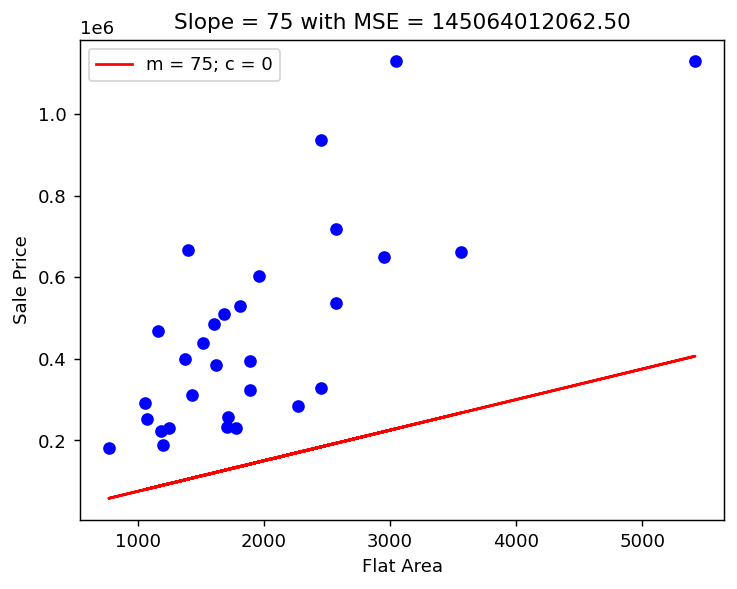

In [8]:
c=0 
m=75
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m +c)
    import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse  # assuming you're using sklearn

# Assuming `line`, `m`, and `sample_data` are already defined
MSE = mse(sample_data.sale_price, line)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='blue')  # scatter plot
plt.plot(sample_data.flat_area, line, label=f'm = {m}; c = 0', color='red')  # predicted line

plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title(f"Slope = {m} with MSE = {MSE:.2f}")
plt.legend()
plt.show()

To find the perfect value of slope

In [13]:
def slope_error(slope, intercept, sample_data):
    sale=[]
    for i in range(len(sample_data)):
        tmp = sample_data.flat_area[i]*slope +intercept
        sale.append(tmp)
    MSE= mse(sample_data.sale_price,sale)
    return MSE

In [14]:
slope = [i/10 for i in range (0,5000)]
Cost=[]
for i in slope:
    cost_of_ith_slope= slope_error(slope=i, intercept=0, sample_data=sample_data)
    Cost.append(cost_of_ith_slope)

In [15]:
Cost_table = pd.DataFrame({'slope':slope, 'Cost': Cost})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


Cost error curve
lower the cost, better the prediction!

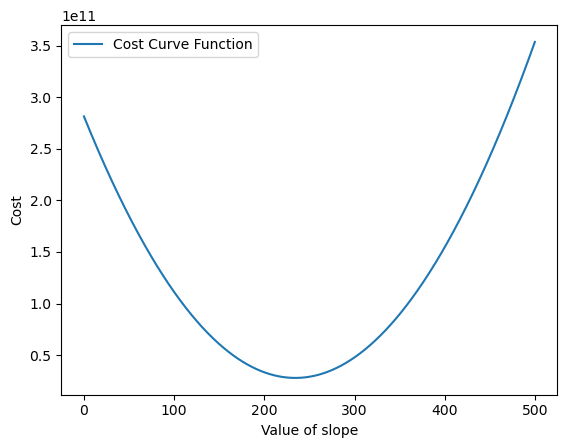

In [16]:
plt.plot(Cost_table.slope, Cost_table.Cost, label= 'Cost Curve Function' )
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [22]:
new_slope= Cost_table['slope'][Cost_table['Cost']==Cost_table['Cost'].min()].iloc[0]
new_slope

234.3

To find the perfect value of the intercept

In [17]:
def intercept_error(slope, intercept, sample_data):
    sale=[]
    for i in range(len(sample_data)):
        tmp = sample_data.flat_area[i]*slope +intercept
        sale.append(tmp)
    MSE= mse(sample_data.sale_price,sale)
    return MSE

In [25]:
intercept = [i for i in range (5000,50000)]
Cost=[]
for i in slope:
    cost_of_ith_intercept= intercept_error(slope=234, intercept=i, sample_data=sample_data)
    Cost.append(cost_of_ith_intercept)

In [26]:
Cost_table = pd.DataFrame({'intercept':intercept, 'Cost': Cost})
Cost_table.tail()

,intercept,Cost
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10
44999,49999,2.929894e+10


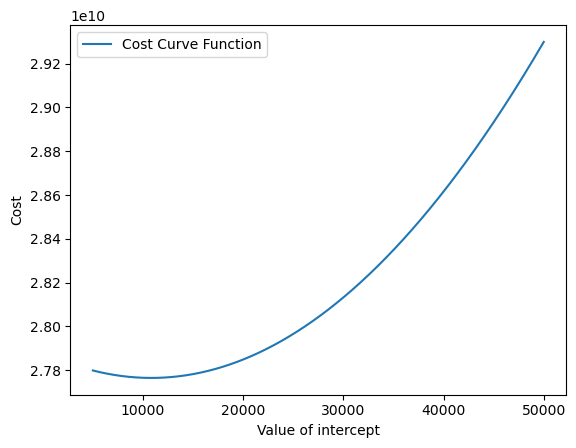

In [27]:
plt.plot(Cost_table.intercept, Cost_table.Cost, label= 'Cost Curve Function' )
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [28]:
new_intercept= Cost_table['intercept'][Cost_table['Cost']==Cost_table['Cost'].min()].iloc[0]
new_intercept

10834

If we update the slope_error function by fixing the intercept with the value we just got above and solve for the optimal slope, and then use that new slope in the intercept_error function to find a better intercept, we can keep repeating this process. We continue until there's no significant change in the values. However, doing this manually is a very tedious and time-consuming process.

But the final optimal m=219 and c= 39428